In [1]:
#Supervised

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
attacks = pd.read_csv('attacks_cleaned_activity.csv')

In [3]:
attacks.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Is_Fatal',
       'Investigator or Source', 'col', 'Month', 'Activity_new', 'Count'],
      dtype='object')

# For supervised machine learning lets take Is_Fatal as the target

# Map everything as unprovoked in attack type

In [4]:
attacks['Type'] = attacks['Type'].replace({'Boat':'Unprovoked','Invalid':'Unprovoked','Boating':'Unprovoked','Sea Disaster':'Unprovoked'})

In [5]:
attacks['Type'].value_counts()

Unprovoked    3447
Provoked       313
Name: Type, dtype: int64

In [6]:
attacks['Sex '] = attacks['Sex '].replace({'M ':'M','N':'F','lli':'F'})

In [7]:
attacks['Sex '].value_counts()

M    3318
F     442
Name: Sex , dtype: int64

# Lets classify fatalities without using text column Injury

In [8]:
attacks_features = attacks[['Type','Sex ','Age','Is_Fatal','Month','Country','Activity_new']]

# Since Month is actually a category lets replace them manually first

In [9]:
attacks_features['Month'] = attacks_features['Month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August'
                                            ,9:'September',10:'October',11:'November',12:'December'})

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
attacks_features['Month'].value_counts()

July         444
August       417
September    366
June         332
January      326
October      303
April        291
December     281
March        256
November     253
May          247
February     244
Name: Month, dtype: int64

In [11]:
attacks_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 7 columns):
Type            3760 non-null object
Sex             3760 non-null object
Age             3760 non-null float64
Is_Fatal        3760 non-null object
Month           3760 non-null object
Country         3760 non-null object
Activity_new    3760 non-null object
dtypes: float64(1), object(6)
memory usage: 205.8+ KB


# Since there is no hierarchy we must one hot encode the categories if they were ranked we can label encode them

In [12]:
cat_df=attacks_features.select_dtypes(include='object')
cat_df.columns

Index(['Type', 'Sex ', 'Is_Fatal', 'Month', 'Country', 'Activity_new'], dtype='object')

In [13]:
attacks_features['Is_Fatal'].value_counts()

N          2966
Y           779
UNKNOWN      11
 N            4
Name: Is_Fatal, dtype: int64

In [14]:
attacks_features['Is_Fatal'] = attacks_features['Is_Fatal'].replace({' N':'N','UNKNOWN':'Y'})

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
attacks_features['Is_Fatal'].value_counts()

N    2970
Y     790
Name: Is_Fatal, dtype: int64

In [16]:
attacks_features['Is_Fatal'].value_counts()/attacks_features.shape[0]*100

N    78.989362
Y    21.010638
Name: Is_Fatal, dtype: float64

# Imbalanced class

In [17]:
attacks_dummy      = pd.get_dummies(attacks_features.drop('Is_Fatal',axis = 1))
attacks_dummy['Is_Fatal'] = attacks_features['Is_Fatal']
attacks_dummy.shape

(3760, 150)

In [18]:
train,test = train_test_split(attacks_dummy,test_size=0.3,
                             random_state = 100)
print(train.shape)
print(test.shape)
train_y = train['Is_Fatal']
test_y  = test['Is_Fatal']
train_x = train.drop(['Is_Fatal'], axis = 1)#axis 1 is for row wise operation
test_x  = test.drop (['Is_Fatal'], axis = 1)
train_x.shape


(2632, 150)
(1128, 150)


(2632, 149)

# We use synthetic minority oversampling technique for dealing with imbalanced classes

In [19]:
#Handling imbalanced class
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(train_x,train_y)
x_train_smote.shape

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(4174, 149)

In [20]:
logreg = LogisticRegression(random_state=1)
logreg.fit(x_train_smote,y_train_smote)
log_pred  = logreg.predict(test_x)
df_logreg   = pd.DataFrame({'actual': test_y,
                         'predicted': log_pred})

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
#MANUALLY CHECKING 
tp_log = df_logreg[(df_logreg['predicted']=='Y') & (df_logreg['actual']=='Y')].shape[0]
tn_log = df_logreg[(df_logreg['predicted']=='N') & (df_logreg['actual']=='N')].shape[0]
fp_log = df_logreg[(df_logreg['predicted']=='N') & (df_logreg['actual']=='Y')].shape[0]
fn_log = df_logreg[(df_logreg['predicted']=='Y') & (df_logreg['actual']=='N')].shape[0]
print(tp_log,tn_log,fp_log,fn_log)

160 644 85 239


In [24]:
#Check confusion matrix
print(confusion_matrix(test_y,log_pred))

[[644 239]
 [ 85 160]]


In [23]:
sensitivity_log = tp_log/(tp_log+fn_log)
print(sensitivity_log)
specificity_log = tn_log/(tn_log+fp_log)
print(specificity_log)
precision_log = tp_log/(tp_log+fp_log)
print(precision_log)
f1_score = 2*(precision_log*sensitivity_log)/(precision_log+sensitivity_log)
print(f1_score)

0.40100250626566414
0.8834019204389575
0.6530612244897959
0.4968944099378882


In [25]:
logisticregression = pd.Series({'TP': tp_log, 'TN' : tn_log, 'FP': fp_log, 'FN': fn_log, 'SENSITIVITY': sensitivity_log,
                  'SPECIFICITY': specificity_log,'Precision':precision_log,'f1_score':f1_score})
logisticregression

TP             160.000000
TN             644.000000
FP              85.000000
FN             239.000000
SENSITIVITY      0.401003
SPECIFICITY      0.883402
Precision        0.653061
f1_score         0.496894
dtype: float64

In [26]:
model_decisiontree = DecisionTreeClassifier(random_state = 1)
model_decisiontree
model_decisiontree.fit(x_train_smote,y_train_smote)
decisiontree_pred = model_decisiontree.predict(test_x)
df_decisiontree = pd.DataFrame({'actual':test_y,
                        'predicted': decisiontree_pred})

In [27]:
#MANUALLY CHECKING 
tp_dt = df_decisiontree[(df_decisiontree['predicted']=='Y') & (df_decisiontree['actual']=='Y')].shape[0]
tn_dt = df_decisiontree[(df_decisiontree['predicted']=='N') & (df_decisiontree['actual']=='N')].shape[0]
fp_dt = df_decisiontree[(df_decisiontree['predicted']=='N') & (df_decisiontree['actual']=='Y')].shape[0]
fn_dt = df_decisiontree[(df_decisiontree['predicted']=='Y') & (df_decisiontree['actual']=='N')].shape[0]
print(tp_dt,tn_dt,fp_dt,fn_dt)

89 762 156 121


In [28]:
sensitivity_dt = tp_dt/(tp_dt+fn_dt)
print(sensitivity_dt)
specificity_dt = tn_dt/(tn_dt+fp_dt)
print(specificity_dt)
precision_dt = tp_dt/(tp_dt+fp_dt)
print(precision_dt)
f1_score_dt = 2*(precision_dt*sensitivity_dt)/(precision_dt+sensitivity_dt)
print(f1_score_dt)


0.4238095238095238
0.8300653594771242
0.363265306122449
0.3912087912087912


In [29]:
decisiontree = pd.Series({'TP': tp_dt, 'TN' : tn_dt, 'FP': fp_dt, 'FN': fn_dt, 'SENSITIVITY': sensitivity_dt,
                  'SPECIFICITY': specificity_dt,'Precision':precision_dt,'f1_score':f1_score_dt})
decisiontree

TP              89.000000
TN             762.000000
FP             156.000000
FN             121.000000
SENSITIVITY      0.423810
SPECIFICITY      0.830065
Precision        0.363265
f1_score         0.391209
dtype: float64

In [32]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train_smote,y_train_smote)

test_pred_rf = model_rf.predict(test_x)
df_rf   = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_rf})

In [33]:
tp_rf = df_rf[(df_rf['predicted']=='Y') & (df_rf['actual']=='Y')].shape[0]
tn_rf = df_rf[(df_rf['predicted']=='N') & (df_rf['actual']=='N')].shape[0]
fp_rf = df_rf[(df_rf['predicted']=='N') & (df_rf['actual']=='Y')].shape[0]
fn_rf = df_rf[(df_rf['predicted']=='Y') & (df_rf['actual']=='N')].shape[0]
print(tp_rf,tn_rf,fp_rf,fn_rf)

79 789 166 94


In [34]:
sensitivity_rf = tp_rf/(tp_rf+fn_rf)
print(sensitivity_rf)
specificity_rf = tn_rf/(tn_rf+fp_rf)
print(specificity_rf)
precision_rf = tp_rf/(tp_rf+fp_rf)
print(precision_rf)
f1_score_rf=2*(precision_rf*sensitivity_rf)/(precision_rf+sensitivity_rf)
print(f1_score_rf)

0.45664739884393063
0.8261780104712042
0.3224489795918367
0.3779904306220095


In [35]:
randomforest = pd.Series({'TP': tp_rf, 'TN' : tn_rf, 'FP': fp_rf, 'FN': fn_rf, 'SENSITIVITY': sensitivity_rf,
                  'SPECIFICITY': specificity_rf,'Precision':precision_rf,'f1_score':f1_score_rf})
randomforest

TP              79.000000
TN             789.000000
FP             166.000000
FN              94.000000
SENSITIVITY      0.456647
SPECIFICITY      0.826178
Precision        0.322449
f1_score         0.377990
dtype: float64

In [41]:
model_ada = AdaBoostClassifier(random_state=1)
model_ada.fit(x_train_smote,y_train_smote)
test_pred_abm = model_ada.predict(test_x)
df_abm  = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_abm})

In [42]:
tp_ada = df_abm[(df_abm['predicted']=='Y') & (df_abm['actual']=='Y')].shape[0]
tn_ada = df_abm[(df_abm['predicted']=='N')& (df_abm['actual']=='N')].shape[0]
fp_ada = df_abm[(df_abm['predicted']=='N') & (df_abm['actual']=='Y')].shape[0]
fn_ada = df_abm[(df_abm['predicted']=='Y') & (df_abm['actual']=='N')].shape[0]
print(tp_ada,tn_ada,fp_ada,fn_ada)

132 731 113 152


In [43]:
sensitivity_abm = tp_ada/(tp_ada+fn_ada)
print(sensitivity_abm)
specificity_abm = tn_ada/(tn_ada+fp_ada)
print(specificity_abm)
precision_abm = tp_ada/(tp_ada+fp_ada)
print(precision_abm)
f1_score_abm=2*(precision_abm*sensitivity_abm)/(precision_abm+sensitivity_abm)
print(f1_score_abm)

0.4647887323943662
0.8661137440758294
0.5387755102040817
0.49905482041587895


In [44]:
s_abm = pd.Series({'TP': tp_ada, 'TN' : tn_ada, 'FP': fp_ada, 'FN': fn_ada, 'SENSITIVITY': sensitivity_abm,
                  'SPECIFICITY': specificity_abm,'Precision':precision_abm,'f1_score':f1_score_abm})
s_abm

TP             132.000000
TN             731.000000
FP             113.000000
FN             152.000000
SENSITIVITY      0.464789
SPECIFICITY      0.866114
Precision        0.538776
f1_score         0.499055
dtype: float64

In [45]:
test_x = test_x.values
xgb = XGBClassifier()
xgb.fit(x_train_smote,y_train_smote)
test_pred_xgb = xgb.predict(test_x)
df_xgb  = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_xgb})

In [46]:
tp_xgb = df_xgb[(df_xgb['predicted']=='Y') & (df_xgb['actual']=='N')].shape[0]
tn_xgb = df_xgb[(df_xgb['predicted']=='N')& (df_xgb['actual']=='N')].shape[0]
fp_xgb = df_xgb[(df_xgb['predicted']=='N') & (df_xgb['actual']=='Y')].shape[0]
fn_xgb = df_xgb[(df_xgb['predicted']=='Y') & (df_xgb['actual']=='N')].shape[0]
print(tp_xgb,tn_xgb,fp_xgb,fn_xgb)

110 773 136 110


In [47]:
sensitivity_xgb = tp_xgb/(tp_xgb+fn_xgb)
print(sensitivity_xgb)
specificity_xgb = tn_xgb/(tn_xgb+fp_xgb)
print(specificity_xgb)

precision_xgb = tp_xgb/(tp_xgb+fp_xgb)
print(precision_xgb)
f1_score_xgb = 2*(precision_xgb*sensitivity_xgb)/(precision_xgb+sensitivity_xgb)
print(f1_score_xgb)

0.5
0.8503850385038504
0.44715447154471544
0.4721030042918455


In [48]:
s_xgb = pd.Series({'TP': tp_xgb, 'TN' : tn_xgb, 'FP': fp_xgb, 'FN': fn_xgb, 'SENSITIVITY': sensitivity_xgb,
                  'SPECIFICITY': specificity_xgb,'Precision':precision_xgb,'f1_score':f1_score_xgb})
s_xgb

TP             110.000000
TN             773.000000
FP             136.000000
FN             110.000000
SENSITIVITY      0.500000
SPECIFICITY      0.850385
Precision        0.447154
f1_score         0.472103
dtype: float64

In [49]:
df_complete = pd.DataFrame({'Logistic Regression': logisticregression, 'Decision Tree': decisiontree, 'Random Forest': randomforest,'Ada Boost':s_abm,'XGBOOST':s_xgb})
df_complete

,Logistic Regression,Decision Tree,Random Forest,Ada Boost,XGBOOST
TP,160.000000,89.000000,79.000000,132.000000,110.000000
TN,644.000000,762.000000,789.000000,731.000000,773.000000
FP,85.000000,156.000000,166.000000,113.000000,136.000000
FN,239.000000,121.000000,94.000000,152.000000,110.000000
SENSITIVITY,0.401003,0.423810,0.456647,0.464789,0.500000
SPECIFICITY,0.883402,0.830065,0.826178,0.866114,0.850385
Precision,0.653061,0.363265,0.322449,0.538776,0.447154
f1_score,0.496894,0.391209,0.377990,0.499055,0.472103


# Considering F1 - Score as the metric we can say that XG-Boost works best(But XG-Boost is bound to do well because of its complexity) and for such small data better to use Logistic Regression or Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = LogisticRegression(), cv = 5, param_grid = {'C': [0.001, 0.1, 1, 10, 100]})
grid.fit(x_train_smote, y_train_smote)


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
log_grid  = grid.predict(test_x)

In [52]:
df_loggrid   = pd.DataFrame({'actual': test_y,
                         'predicted': log_grid})

In [53]:
tp_grid = df_loggrid[(df_loggrid['predicted']=='Y') & (df_loggrid['actual']=='Y')].shape[0]
tn_grid = df_loggrid[(df_loggrid['predicted']=='N') & (df_loggrid['actual']=='N')].shape[0]
fp_grid = df_loggrid[(df_loggrid['predicted']=='N') & (df_loggrid['actual']=='Y')].shape[0]
fn_grid = df_loggrid[(df_loggrid['predicted']=='Y') & (df_loggrid['actual']=='N')].shape[0]
print(tp_grid,tn_grid,fp_grid,fn_grid)

160 644 85 239


In [54]:
sensitivity_grid = tp_grid/(tp_grid+fn_grid)
print(sensitivity_grid)
specificity_grid = tn_grid/(tn_grid+fp_grid)
print(specificity_grid)
precision_grid = tp_grid/(tp_grid+fp_grid)
print(precision_grid)
f1_score_grid = 2*(precision_grid*sensitivity_grid)/(precision_grid+sensitivity_grid)
print(f1_score_grid)

0.40100250626566414
0.8834019204389575
0.6530612244897959
0.4968944099378882


# Grid search CV didnt improve results

In [55]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [56]:
# Fit the grid search to the data
grid_search.fit(x_train_smote, y_train_smote)
grid_search.best_params_



Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.6min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

# Fit random forest for this parameters


In [57]:
model_rf_grid = RandomForestClassifier(random_state=1,n_estimators=300,max_features=3,max_depth=30,bootstrap=True,min_samples_leaf=3,min_samples_split=8)
model_rf_grid.fit(x_train_smote,y_train_smote)

test_pred_rf_grid = model_rf_grid.predict(test_x)
grid_rf   = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_rf_grid})

In [58]:
tp_rf_grid = grid_rf[(grid_rf['predicted']=='Y') & (grid_rf['actual']=='Y')].shape[0]
tn_rf_grid = grid_rf[(grid_rf['predicted']=='N') & (grid_rf['actual']=='N')].shape[0]
fp_rf_grid = grid_rf[(grid_rf['predicted']=='N') & (grid_rf['actual']=='Y')].shape[0]
fn_rf_grid = grid_rf[(grid_rf['predicted']=='Y') & (grid_rf['actual']=='N')].shape[0]
print(tp_rf_grid,tn_rf_grid,fp_rf_grid,fn_rf_grid)

131 727 114 156


In [59]:
sensitivity_rf_grid = tp_rf_grid/(tp_rf_grid+fn_rf_grid)
print(sensitivity_rf_grid)
specificity_rf_grid = tn_rf_grid/(tn_rf_grid+fp_rf_grid)
print(specificity_rf_grid)
precision_rf_grid = tp_rf_grid/(tp_rf_grid+fp_rf_grid)
print(precision_rf_grid)
f1_score_rf_grid=2*(precision_rf_grid*sensitivity_rf_grid)/(precision_rf_grid+sensitivity_rf_grid)
print(f1_score_rf_grid)

0.4564459930313589
0.8644470868014269
0.5346938775510204
0.4924812030075188


# Tuning the Random forest increased the performance 

# Building models using Injury column

In [83]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chithsabesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [93]:
attacks_injury = attacks[['Injury','Is_Fatal']]

Text Cleaning 

In [94]:
docs = attacks_injury['Injury'].str.lower().str.replace('[^a-z ]', '')

In [95]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [96]:
stemmer = nltk.stem.PorterStemmer()
docs_clean = []
for doc in docs.head(2):
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
    
print(docs_clean)

['minor injuri thigh', 'lacer hand']


In [97]:
docs = attacks['Injury'].str.lower().str.replace('[^a-z ]', '')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
#docs_clean.head(1)

# Document Term Matrix

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<3760x871 sparse matrix of type '<class 'numpy.int64'>'
	with 14601 stored elements in Compressed Sparse Row format>

In [99]:
docs_clean.shape

(3760,)

In [100]:
no_of_zeros = (3760 * 871) - 14601
sparsity = (no_of_zeros) / (3760*871) * 100
sparsity

99.55416249358771

In [109]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())
(df_dtm == 0).sum().sum()

3260359

In [114]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm,
                                   test_size=0.2,
                                   random_state=100)

In [115]:
train_y = attacks_injury.iloc[train_x.index]['Is_Fatal']
test_y  = attacks_injury.iloc[test_x.index]['Is_Fatal']

In [117]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(train_x, train_y)
predict_class = model.predict(test_x)

In [119]:
df_gnb  = pd.DataFrame({'actual': test_y,
                         'predicted': predict_class})

In [120]:
tp_gnb = df_gnb[(df_gnb['predicted']=='Y') & (df_gnb['actual']=='Y')].shape[0]
tn_gnb = df_gnb[(df_gnb['predicted']=='N') & (df_gnb['actual']=='N')].shape[0]
fp_gnb = df_gnb[(df_gnb['predicted']=='N') & (df_gnb['actual']=='Y')].shape[0]
fn_gnb = df_gnb[(df_gnb['predicted']=='Y') & (df_gnb['actual']=='N')].shape[0]
print(tp_gnb,tn_gnb,fp_gnb,fn_gnb)

152 168 6 384


In [121]:
sensitivity_gnb = tp_gnb/(tp_gnb+fn_gnb)
print(sensitivity_gnb)
specificity_gnb = tn_gnb/(tn_gnb+fp_gnb)
print(specificity_gnb)
precision_gnb = tp_gnb/(tp_gnb+fp_gnb)
print(precision_gnb)
f1_score_gnb=2*(precision_gnb*sensitivity_gnb)/(precision_gnb+sensitivity_gnb)
print(f1_score_gnb)

0.2835820895522388
0.9655172413793104
0.9620253164556962
0.43804034582132567


In [123]:
#Multinomial NB
model = MultinomialNB()
model.fit(train_x, train_y)
predict_class = model.predict(test_x)

In [124]:
df_mnb  = pd.DataFrame({'actual': test_y,
                         'predicted': predict_class})

In [125]:
tp_mnb = df_mnb[(df_mnb['predicted']=='Y') & (df_mnb['actual']=='Y')].shape[0]
tn_mnb = df_mnb[(df_mnb['predicted']=='N') & (df_mnb['actual']=='N')].shape[0]
fp_mnb = df_mnb[(df_mnb['predicted']=='N') & (df_mnb['actual']=='Y')].shape[0]
fn_mnb = df_mnb[(df_mnb['predicted']=='Y') & (df_mnb['actual']=='N')].shape[0]
print(tp_mnb,tn_mnb,fp_mnb,fn_mnb)

158 583 1 5


In [126]:
sensitivity_mnb = tp_mnb/(tp_mnb+fn_mnb)
print(sensitivity_mnb)
specificity_mnb = tn_mnb/(tn_mnb+fp_mnb)
print(specificity_mnb)
precision_mnb = tp_mnb/(tp_mnb+fp_mnb)
print(precision_mnb)
f1_score_mnb=2*(precision_mnb*sensitivity_mnb)/(precision_mnb+sensitivity_mnb)
print(f1_score_mnb)

0.9693251533742331
0.9982876712328768
0.9937106918238994
0.9813664596273292


# Multinomial Naive bayes is excellent for classifying Fatality with just one Text Column

# Unsupervised Clustering of the attacks

In [127]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 19 columns):
Unnamed: 0                3760 non-null int64
Case Number               3760 non-null object
Date                      3760 non-null object
Year                      3760 non-null int64
Type                      3760 non-null object
Country                   3760 non-null object
Area                      3760 non-null object
Location                  3760 non-null object
Activity                  3760 non-null object
Name                      3760 non-null object
Sex                       3760 non-null object
Age                       3760 non-null float64
Injury                    3760 non-null object
Is_Fatal                  3760 non-null object
Investigator or Source    3760 non-null object
col                       3760 non-null object
Month                     3760 non-null object
Activity_new              3760 non-null object
Count                     3760 non-null int64
dt

In [130]:
attacks_clustering = attacks[['Type','Country','Area','Sex ','Age','Is_Fatal','Month','Activity_new']]

In [132]:
attacks_clustering_dummies = pd.get_dummies(attacks_clustering)

Text(0, 0.5, 'Total Within sum of squares')

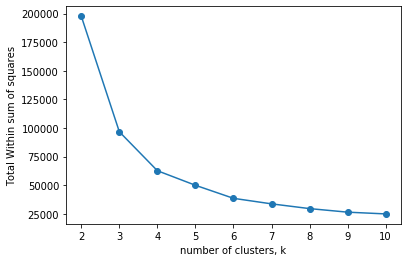

In [136]:
# Import KMeans
from sklearn.cluster import KMeans

n_clusts = range(2,11)
TWSS=[]

for k in n_clusts:
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(attacks_clustering_dummies)
    TWSS.append(model.inertia_)

# Plot 
plt.plot(n_clusts, TWSS, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Total Within sum of squares')

In [147]:
best_model = KMeans(n_clusters=3, random_state=10)
best_model.fit(attacks_clustering_dummies)
clusters = best_model.predict(attacks_clustering_dummies)

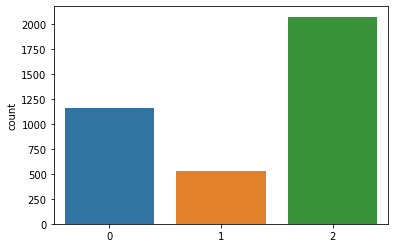

In [148]:
df = pd.DataFrame({'clusters': clusters})
cluster_size = df.groupby(clusters).size()

sns.countplot(clusters)

# No Dramatic Fall in TWSS so difficult to pick K so we will choose 3

Text(0, 0.5, 'silhouette score')

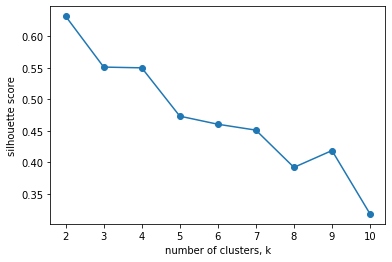

In [137]:
from sklearn.metrics import silhouette_score

n_clusts = range(2,11)
silhouette=[]

for k in n_clusts:
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(attacks_clustering_dummies)
    labels = model.predict(attacks_clustering_dummies)
    silhouette.append(silhouette_score(attacks_clustering_dummies, labels))

# Plot 
plt.plot(n_clusts, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')

# N_cluster=2 has the highest siloutte score hence we can choose 2 as number of clusters

In [142]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(attacks_clustering_dummies)
silhouette_score(attacks_clustering_dummies, labels)

0.6259578046792377

Text(0, 0.5, 'silhouette score')

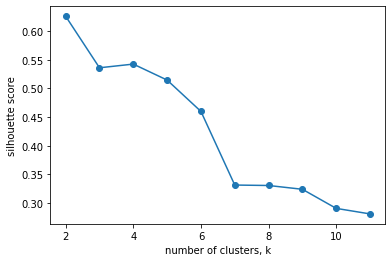

In [143]:
n_clusts = range(2,12)
silhouette=[]

for k in n_clusts:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(attacks_clustering_dummies)
    silhouette.append(silhouette_score(attacks_clustering_dummies, labels))

# Plot 
plt.plot(n_clusts, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')